In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv


In [2]:
df=pd.read_csv('/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv')
df.head(3)


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2


In [3]:
df.columns


Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


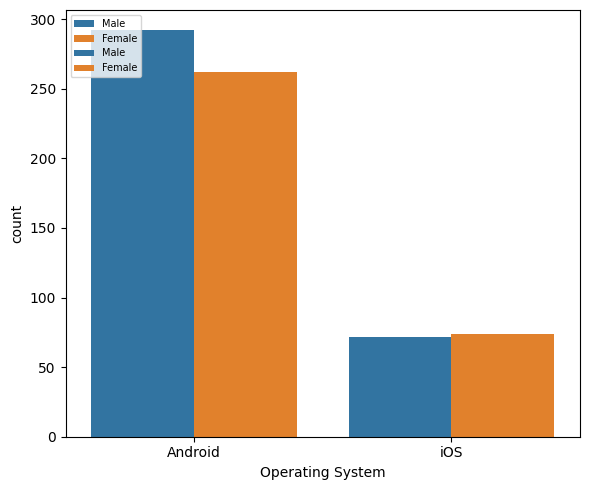

In [5]:
plt.figure(figsize=(6,5))
sns.countplot(data=df,x=df['Device Model'],hue=df['Gender'])
sns.countplot(data=df,x=df['Operating System'],hue=df['Gender'])

plt.legend(loc='upper left',fontsize=7)
plt.axis()
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

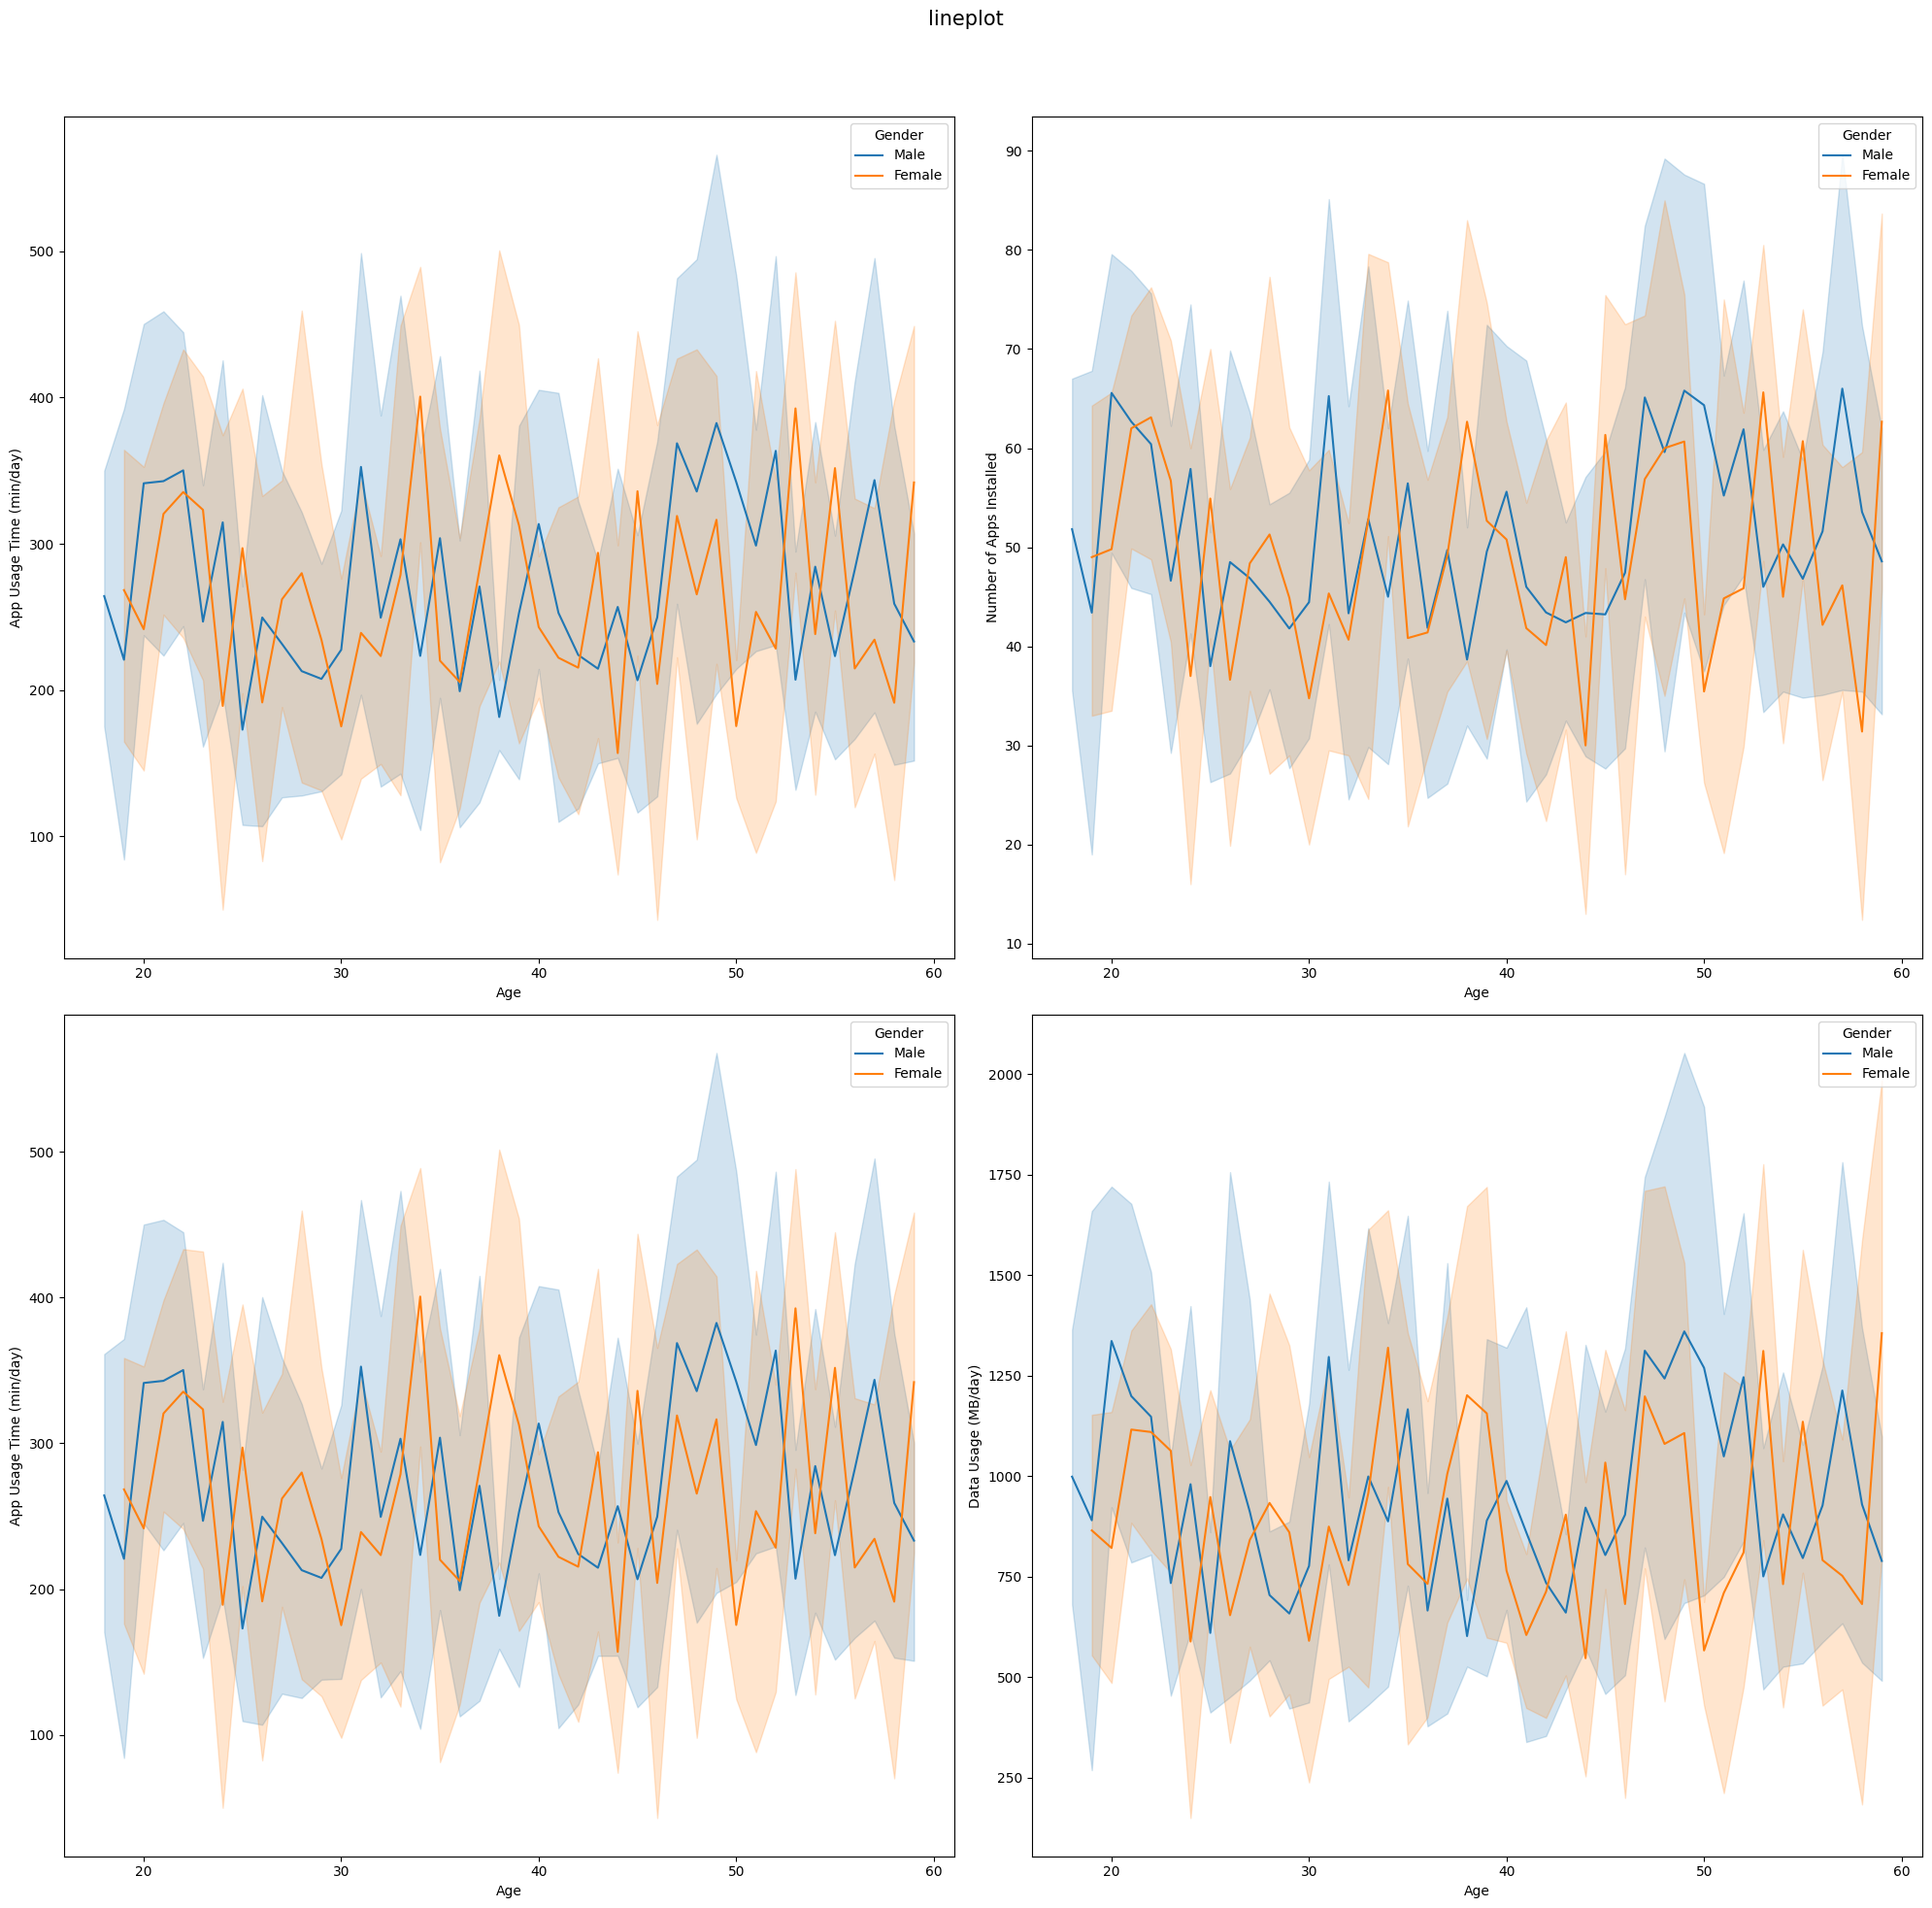

In [6]:
fig,ax=plt.subplots(2,2,figsize=(20,20))
sns.lineplot(data=df,y=df['App Usage Time (min/day)'],x=df['Age'],hue=df['Gender'],ax=ax[0][0])
sns.lineplot(data=df,x=df['Age'],y=df['Number of Apps Installed'],hue=df['Gender'],ax=ax[0][1])
sns.lineplot(data=df,x=df['Age'],y=df['Data Usage (MB/day)'],hue=df['Gender'],ax=ax[1][1])
sns.lineplot(data=df,y=df['App Usage Time (min/day)'],x=df['Age'],hue=df['Gender'],ax=ax[1][0])
plt.suptitle('lineplot',fontsize=15)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

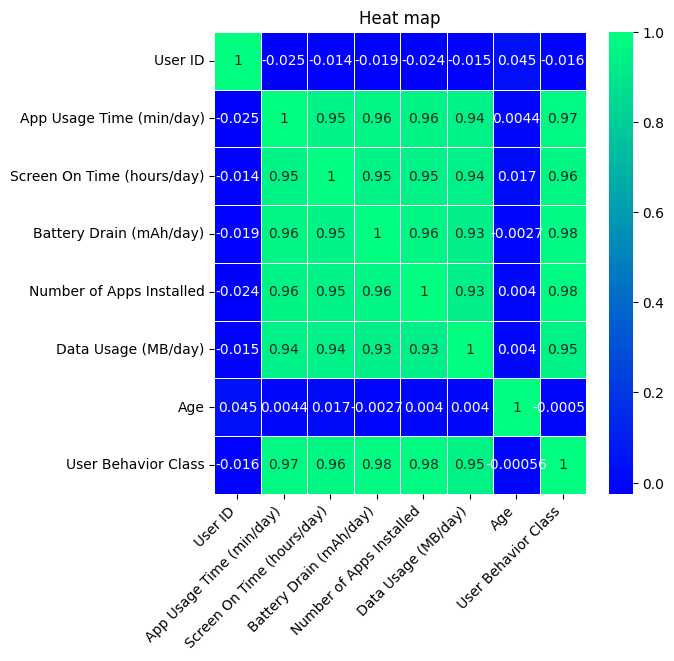

In [7]:
plt.figure(figsize=(6,6))
corr=df.select_dtypes(include=['int64','float64']).corr()
sns.heatmap(corr,annot=True,cmap='winter',linewidth=0.5)
plt.yticks(rotation=0)
plt.xticks(rotation=45,ha='right')
plt.title('Heat map')
plt.show()


In [8]:
'''
Preprocessing
'''

'\nPreprocessing\n'

In [9]:
df.drop(columns=['User ID'],inplace=True,axis=1)

In [10]:

encoder=OneHotEncoder(sparse=False,drop='first')
one_hot_encoded=encoder.fit_transform(df[['Device Model','Operating System','Gender']])
encoded_df=pd.DataFrame(one_hot_encoded,columns=encoder.get_feature_names_out(['Device Model','Operating System','Gender']))
df_encoded=pd.concat([df,encoded_df],axis=1).drop(columns=['Device Model','Operating System','Gender'])
df_encoded

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Operating System_iOS,Gender_Male
0,393,6.4,1872,67,1122,40,4,0.0,0.0,0.0,0.0,0.0,1.0
1,268,4.7,1331,42,944,47,3,1.0,0.0,0.0,0.0,0.0,0.0
2,154,4.0,761,32,322,42,2,0.0,0.0,1.0,0.0,0.0,1.0
3,239,4.8,1676,56,871,20,3,0.0,0.0,0.0,0.0,0.0,1.0
4,187,4.3,1367,58,988,31,3,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,92,3.9,1082,26,381,22,2,0.0,0.0,0.0,1.0,1.0,1.0
696,316,6.8,1965,68,1201,59,4,0.0,0.0,1.0,0.0,0.0,1.0
697,99,3.1,942,22,457,50,2,0.0,0.0,0.0,0.0,0.0,0.0
698,62,1.7,431,13,224,44,1,0.0,1.0,0.0,0.0,0.0,1.0


In [11]:
scaler=StandardScaler()
to_scale=['Battery Drain (mAh/day)','Data Usage (MB/day)','App Usage Time (min/day)']
df_encoded[to_scale]=scaler.fit_transform(df_encoded[to_scale])
df_encoded



,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Operating System_iOS,Gender_Male
0,0.688256,6.4,0.423726,67,0.300405,40,4,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.017668,4.7,-0.237198,42,0.022277,47,3,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.661471,4.0,-0.933550,32,-0.949607,42,2,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.181443,4.8,0.184279,56,-0.091787,20,3,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.475107,4.3,-0.193218,58,0.091028,31,3,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,-1.011609,3.9,-0.541394,26,-0.857419,22,2,0.0,0.0,0.0,1.0,1.0,1.0
696,0.253407,6.8,0.537341,68,0.423843,59,4,0.0,0.0,1.0,0.0,0.0,1.0
697,-0.972078,3.1,-0.712428,22,-0.738668,50,2,0.0,0.0,0.0,0.0,0.0,0.0
698,-1.181031,1.7,-1.336702,13,-1.102733,44,1,0.0,1.0,0.0,0.0,0.0,1.0


In [12]:
'''
Using Models
'''

'\nUsing Models\n'

In [13]:
X=df_encoded.drop(columns=['User Behavior Class'])
y=df_encoded['User Behavior Class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
models={
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-NearestNeighbors': KNeighborsClassifier(),
    'Support Vector Machines': SVC(),
    'Gradient Boosting Machines': GradientBoostingClassifier()
}
for model_name, model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print(f'model {model_name}:{accuracy}')
    


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


model Logistic Regression:0.9619047619047619
model Random Forest:1.0
model Decision Tree:1.0
model K-NearestNeighbors:0.9952380952380953
model Support Vector Machines:0.9714285714285714
model Gradient Boosting Machines:1.0
